In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
Data_house_price = pd.read_csv('House_Price_Classification.csv', header=0)

In [19]:
Data_house_price.head(4)

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
0,24.0,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347,0
1,21.6,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146,1
2,34.7,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764,0
3,33.4,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151,0


In [20]:
Data_house_price.describe(include='all')

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506,498.000000,506.000000,506,506.000000,506,506.000000,506.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,4,NaN,1,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES,NaN,NaN,River,NaN,YES,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,279,NaN,NaN,183,NaN,506,NaN,NaN
mean,22.528854,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,NaN,7.899767,13.041605,NaN,39.181818,NaN,0.054454,0.454545
std,9.182176,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,NaN,1.476683,5.238957,NaN,12.513697,NaN,0.010632,0.498422
min,5.000000,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,NaN,5.268000,10.057600,NaN,3.000000,NaN,0.033292,0.000000
25%,17.025000,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,NaN,6.634500,11.189800,NaN,28.000000,NaN,0.046464,0.000000
50%,21.200000,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,NaN,7.999000,12.720000,NaN,39.000000,NaN,0.053507,0.000000
75%,25.000000,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,NaN,9.088000,14.170800,NaN,50.000000,NaN,0.061397,1.000000


In [21]:
#FROM_DESCRIBE
# _ n_hos_beds has na values which could be filled with either of mean or  median, coz they are very close. 
# _ replace non-num columns with dummy cols with num values to make them ready for model.
# _ Look for a suitable replacement to replace 4 dist with 1 that suits more than these individually.
# _ bus terminal is present in dist, coz only 1 unique value. So, it's not req



In [22]:
Data_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   resid_area   506 non-null    float64
 2   air_qual     506 non-null    float64
 3   room_num     506 non-null    float64
 4   age          506 non-null    float64
 5   dist1        506 non-null    float64
 6   dist2        506 non-null    float64
 7   dist3        506 non-null    float64
 8   dist4        506 non-null    float64
 9   teachers     506 non-null    float64
 10  poor_prop    506 non-null    float64
 11  airport      506 non-null    object 
 12  n_hos_beds   498 non-null    float64
 13  n_hot_rooms  506 non-null    float64
 14  waterbody    506 non-null    object 
 15  rainfall     506 non-null    int64  
 16  bus_ter      506 non-null    object 
 17  parks        506 non-null    float64
 18  Sold         506 non-null    int64  
dtypes: float

In [23]:
col_to_drop = ['dist2', 'dist3', 'dist4', 'bus_ter']
Data_house_price.drop(
    columns= col_to_drop,
    inplace= True
)
del col_to_drop

In [24]:
Data_house_price = pd.get_dummies(Data_house_price)
Data_house_price.head(n = 2)

,price,resid_area,air_qual,room_num,age,dist1,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold,airport_NO,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_None,waterbody_River
0,24.0,32.31,0.538,6.575,65.2,4.35,24.7,4.98,5.480,11.1920,23,0.049347,0,0,1,0,0,0,1
1,21.6,37.07,0.469,6.421,78.9,4.99,22.2,9.14,7.332,12.1728,42,0.046146,1,1,0,1,0,0,0


In [25]:
corr_data_ = Data_house_price.corr().sort_values(by = 'price',ascending=False)
print(corr_data_['price'])

price                       1.000000
room_num                    0.696304
teachers                    0.505655
dist1                       0.251355
airport_YES                 0.182867
n_hos_beds                  0.109646
waterbody_River             0.071751
waterbody_Lake              0.036233
n_hot_rooms                 0.023122
waterbody_Lake and River   -0.037497
rainfall                   -0.047426
waterbody_None             -0.077478
Sold                       -0.154698
airport_NO                 -0.182867
age                        -0.377999
parks                      -0.391574
air_qual                   -0.429300
resid_area                 -0.484754
poor_prop                  -0.740836
Name: price, dtype: float64


In [26]:
#Deleting Columns that have least effect on price
cols_to_del = ['waterbody_River', 'waterbody_Lake', 'n_hot_rooms', 'waterbody_Lake and River', 'rainfall', 'waterbody_None']
Data_house_price.drop(columns=cols_to_del, inplace=True)
del cols_to_del

In [27]:
Data_house_price['n_hos_beds'].fillna(
    value= Data_house_price['n_hos_beds'].median(),
    inplace=True
)
Data_house_price.describe()

,price,resid_area,air_qual,room_num,age,dist1,teachers,poor_prop,n_hos_beds,parks,Sold,airport_NO,airport_YES
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,41.136779,0.554695,6.284634,68.574901,3.971996,21.544466,12.653063,7.901336,0.054454,0.454545,0.448617,0.551383
std,9.182176,6.860353,0.115878,0.702617,28.148861,2.108532,2.164946,7.141062,1.464992,0.010632,0.498422,0.497845,0.497845
min,5.000000,30.460000,0.385000,3.561000,2.900000,1.130000,18.000000,1.730000,5.268000,0.033292,0.000000,0.000000,0.000000
25%,17.025000,35.190000,0.449000,5.885500,45.025000,2.270000,19.800000,6.950000,6.659000,0.046464,0.000000,0.000000,0.000000
50%,21.200000,39.690000,0.538000,6.208500,77.500000,3.385000,20.950000,11.360000,7.999000,0.053507,0.000000,0.000000,1.000000
75%,25.000000,48.100000,0.624000,6.623500,94.075000,5.367500,22.600000,16.955000,9.076000,0.061397,1.000000,1.000000,1.000000
max,50.000000,57.740000,0.871000,8.780000,100.000000,12.320000,27.400000,37.970000,10.876000,0.086711,1.000000,1.000000,1.000000


In [28]:
#Outlier Treatment

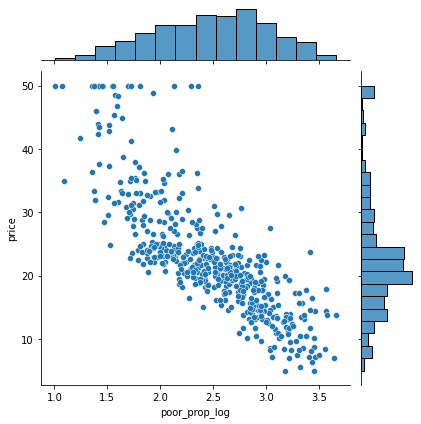

In [29]:
#Price vs poor_prop graph is an exp curve
Data_house_price['poor_prop_log'] = np.log(1 + Data_house_price['poor_prop'])
scatter_price_vs_poor_prop_log = sns.jointplot(x='poor_prop_log', y = 'price', data=Data_house_price)

In [30]:
corr_data_ = Data_house_price.corr().sort_values(by = 'price',ascending=False)
print(corr_data_['price'])

price            1.000000
room_num         0.696304
teachers         0.505655
dist1            0.251355
airport_YES      0.182867
n_hos_beds       0.108513
Sold            -0.154698
airport_NO      -0.182867
age             -0.377999
parks           -0.391574
air_qual        -0.429300
resid_area      -0.484754
poor_prop       -0.740836
poor_prop_log   -0.813626
Name: price, dtype: float64


In [31]:
Data_house_price.describe()

,price,resid_area,air_qual,room_num,age,dist1,teachers,poor_prop,n_hos_beds,parks,Sold,airport_NO,airport_YES,poor_prop_log
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,41.136779,0.554695,6.284634,68.574901,3.971996,21.544466,12.653063,7.901336,0.054454,0.454545,0.448617,0.551383,2.475610
std,9.182176,6.860353,0.115878,0.702617,28.148861,2.108532,2.164946,7.141062,1.464992,0.010632,0.498422,0.497845,0.497845,0.539033
min,5.000000,30.460000,0.385000,3.561000,2.900000,1.130000,18.000000,1.730000,5.268000,0.033292,0.000000,0.000000,0.000000,1.004302
25%,17.025000,35.190000,0.449000,5.885500,45.025000,2.270000,19.800000,6.950000,6.659000,0.046464,0.000000,0.000000,0.000000,2.073162
50%,21.200000,39.690000,0.538000,6.208500,77.500000,3.385000,20.950000,11.360000,7.999000,0.053507,0.000000,0.000000,1.000000,2.514464
75%,25.000000,48.100000,0.624000,6.623500,94.075000,5.367500,22.600000,16.955000,9.076000,0.061397,1.000000,1.000000,1.000000,2.887869
max,50.000000,57.740000,0.871000,8.780000,100.000000,12.320000,27.400000,37.970000,10.876000,0.086711,1.000000,1.000000,1.000000,3.662792


In [32]:
cols_to_del = ['poor_prop']
Data_house_price.drop(columns= cols_to_del, inplace= True)
del cols_to_del

In [33]:
Data_house_price.head()

,price,resid_area,air_qual,room_num,age,dist1,teachers,n_hos_beds,parks,Sold,airport_NO,airport_YES,poor_prop_log
0,24.0,32.31,0.538,6.575,65.2,4.35,24.7,5.480,0.049347,0,0,1,1.788421
1,21.6,37.07,0.469,6.421,78.9,4.99,22.2,7.332,0.046146,1,1,0,2.316488
2,34.7,37.07,0.469,7.185,61.1,5.03,22.2,7.394,0.045764,0,1,0,1.615420
3,33.4,32.18,0.458,6.998,45.8,6.21,21.3,9.268,0.047151,0,0,1,1.371181
4,36.2,32.18,0.458,7.147,54.2,6.16,21.3,8.824,0.039474,0,1,0,1.845300


In [34]:
Data_house_price.to_csv("Clean_Data_Classification.csv")